In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_excel("C:\\Users\\DELL\\Documents\\College files Lovishka Soni\\Online Retail.xlsx", dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
df1.shape

(541909, 8)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [6]:
#### 1. DATA CLEANING: HANDLING MISSING VALUES

In [7]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
df1[df1.StockCode=='22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [10]:
df1[df1.StockCode=='22139'].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: string

In [11]:
df1[['StockCode','Description']].value_counts()

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2302
22423      REGENCY CAKESTAND 3 TIER              2200
85099B     JUMBO BAG RED RETROSPOT               2159
47566      PARTY BUNTING                         1727
20725      LUNCH BAG RED RETROSPOT               1638
                                                 ... 
21491      SET OF THREE VINTAGE GIFT WRAPS          1
84876D     damaged                                  1
20827      damages                                  1
20832      check                                    1
21578      ?                                        1
Name: count, Length: 4792, dtype: int64

In [12]:
df1[['StockCode','Description']].value_counts().reset_index()

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [13]:
most_freq=df1[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [14]:
most_freq[most_freq.StockCode=='85123A']

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3320,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4283,85123A,?,1
4284,85123A,wrongly marked carton 22804,1


In [15]:
most_freq[most_freq.StockCode=='85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [16]:
most_freq=most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [17]:
most_freq.columns=['StockCode','most_freq_desc','count']
df2=df1.merge(most_freq,on='StockCode',how='left')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,most_freq_desc,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [18]:
df2['Description']=df2['most_freq_desc']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,most_freq_desc,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [19]:
df2.isnull().sum()

InvoiceNo              0
StockCode              0
Description          112
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
most_freq_desc       112
count                112
dtype: int64

In [20]:
df2.dropna(subset=['Description'],inplace=True)
df2.isnull().sum()

InvoiceNo              0
StockCode              0
Description            0
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        134968
Country                0
most_freq_desc         0
count                  0
dtype: int64

In [21]:
df2.drop(columns=['most_freq_desc','count'],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [23]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [24]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [25]:
df3=df2[(df2.Quantity>0) & (df2.UnitPrice>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [26]:
df3.Quantity.quantile(0.99)

np.float64(100.0)

In [27]:
df3.Quantity.quantile(0.9999)

np.float64(1439.8763999990188)

In [28]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


In [29]:
#### 2. Feature Engineering

In [30]:
df4=df3.copy()
df4['Total_Sales']=df4['Quantity']*df4['UnitPrice']
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [31]:
df4['Month']=df4['InvoiceDate'].dt.month
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12


In [32]:
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
255943,559418,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-07-08 11:36:00,0.85,12681.0,France,8.50,7
426486,573355,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-10-30 12:43:00,1.25,15865.0,United Kingdom,15.00,10
378868,569669,22505,MEMO BOARD COTTAGE DESIGN,2,2011-10-05 13:47:00,4.95,14730.0,United Kingdom,9.90,10
523979,580527,23416,CHAMBRE HOOK,2,2011-12-04 15:19:00,0.39,13736.0,United Kingdom,0.78,12
469866,576614,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,2,2011-11-15 16:38:00,1.65,12933.0,United Kingdom,3.30,11


In [33]:
#### 3.Data Visualization & EDA

In [34]:
## 3.1. Plot Monthly Sales

In [35]:
monthly_sales=df4.groupby('Month')['Total_Sales'].sum()
monthly_sales

Month
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: Total_Sales, dtype: float64

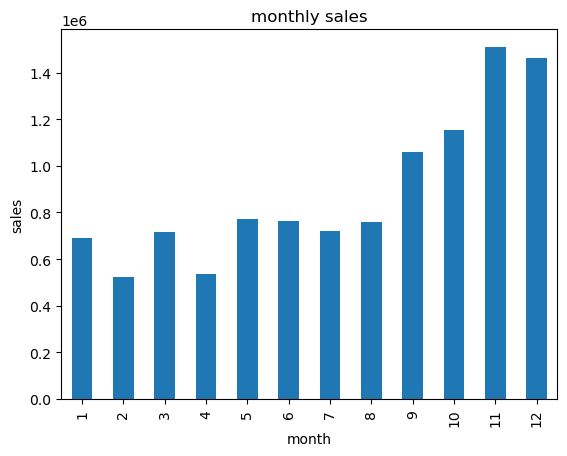

In [36]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind='bar',title='monthly sales')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

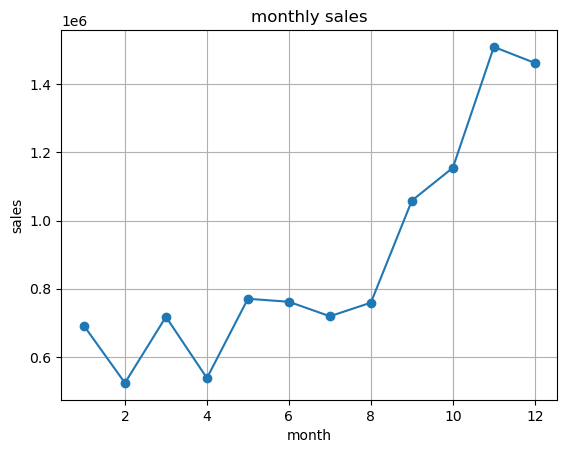

In [37]:
monthly_sales.plot(kind='line',title='monthly sales',marker='o')
plt.xlabel('month')
plt.ylabel('sales')
plt.grid()
plt.show()

In [38]:
## Insights: 
# Total sales started rising up in August and having the peek in november. This is likely due to the holiday season at the end of the year.

In [39]:
## 3.2. Top 5 countries by sales

In [40]:
top5count= df4.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False).head(5)
top5count

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: Total_Sales, dtype: float64

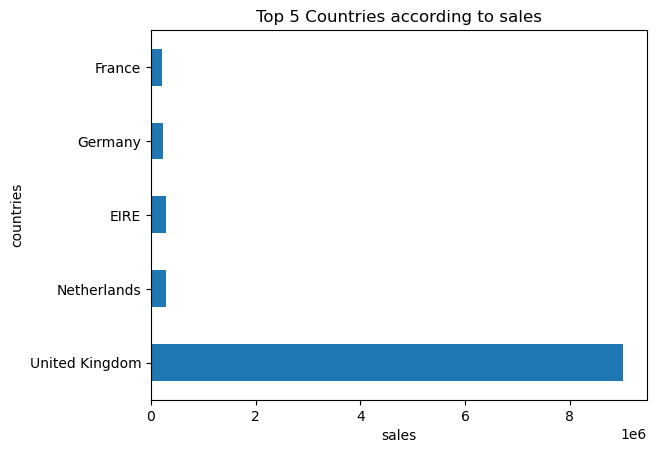

In [41]:
top5count.plot(kind='barh',title='Top 5 Countries according to sales')
plt.xlabel('sales')
plt.ylabel('countries')
plt.show()

In [42]:
add=top5count.sum()
percentage_contri=(top5count/add)*100
percentage_contri

Country
United Kingdom    89.958016
Netherlands        2.845158
EIRE               2.825300
Germany            2.281211
France             2.090315
Name: Total_Sales, dtype: float64

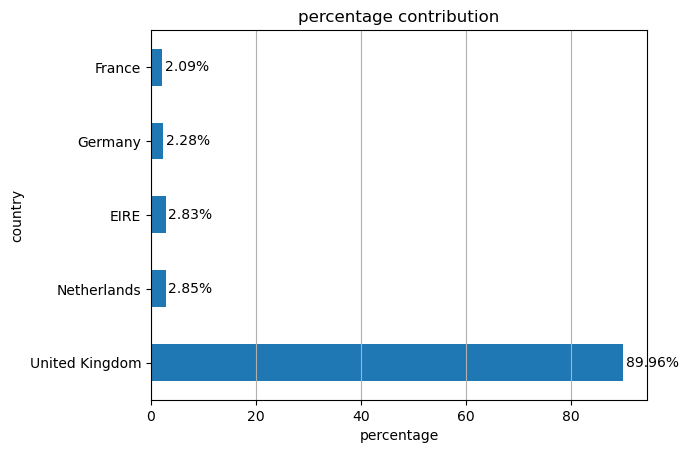

In [43]:
percentage_contri.plot(kind='barh',title='percentage contribution')
plt.ylabel('country')
plt.xlabel('percentage')
plt.grid(axis='x')
# Add labels to bars
for index, value in enumerate(percentage_contri):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')
plt.show()

In [44]:
country_wise=df4.groupby('Country')['Total_Sales'].sum()
total_sales=country_wise.sum()
total_sales

np.float64(10666684.544)

In [45]:
percentage=(top5count/total_sales)*100
percentage

Country
United Kingdom    84.611315
Netherlands        2.676055
EIRE               2.657376
Germany            2.145626
France             1.966076
Name: Total_Sales, dtype: float64

In [46]:
##insights:
## you have too much dependency on a single country

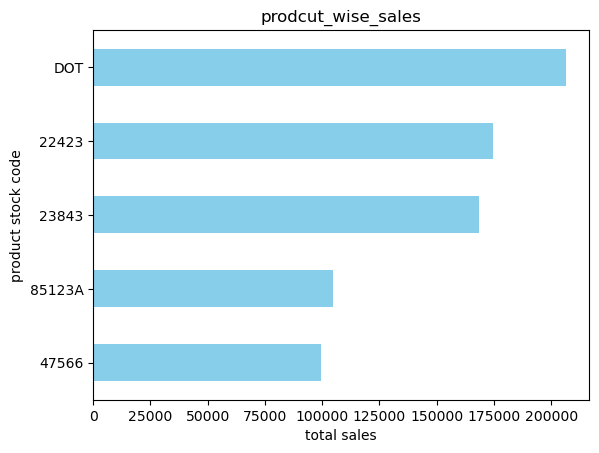

In [47]:
product_wise_sales=df4.groupby('StockCode')['Total_Sales'].sum()
top5prod=product_wise_sales.sort_values(ascending=False).head(5)
top5prod.plot(kind='barh',color='skyblue')
plt.title('prodcut_wise_sales')
plt.xlabel('total sales')
plt.ylabel('product stock code')
plt.gca().invert_yaxis()
plt.show()

In [48]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [49]:
for stock_code in top5prod.index:
    description=df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code}==>{description}")

DOT==>DOTCOM POSTAGE
22423==>REGENCY CAKESTAND 3 TIER
23843==>PAPER CRAFT , LITTLE BIRDIE
85123A==>WHITE HANGING HEART T-LIGHT HOLDER
47566==>PARTY BUNTING


In [50]:
total_sales=product_wise_sales.sum()
percentage=(top5prod/total_sales)*100
percentage

StockCode
DOT       1.933579
22423     1.635792
23843     1.579400
85123A    0.979862
47566     0.932852
Name: Total_Sales, dtype: float64

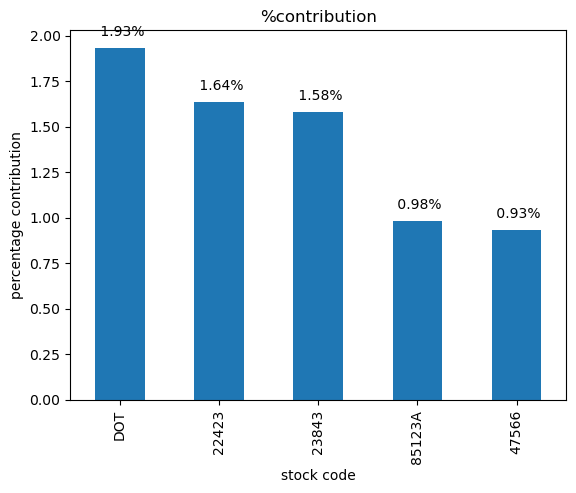

In [51]:
percentage.plot(kind='bar',title='%contribution')
plt.xlabel("stock code")
plt.ylabel("percentage contribution")
for index,value in enumerate(percentage):
    plt.text(index, value+0.05, f"{value: .2f}%",ha='center',va='bottom')
plt.show()

In [72]:
####RFM Analysis

In [58]:
df4.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [60]:
current_date=df4.InvoiceDate.max()+pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [66]:
rfm= df4.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (current_date-x.max()).days,
    'InvoiceNo':'count',
    'Total_Sales':'sum'
})
rfm.columns=['Recency','Frequency','Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [71]:
df4[df4.CustomerID==12347.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.20,12
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.00,12
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00,12
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,23.40,12
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.00,12
...,...,...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347.0,Iceland,8.50,12
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347.0,Iceland,23.40,12
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland,13.28,12
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347.0,Iceland,8.40,12


In [74]:
rfm['R_segment']=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_segment']=pd.qcut(rfm['Frequency'],4,labels=[1,2,3,4])
rfm['M_segment']=pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])

In [76]:
rfm['rfm_score']=rfm[['R_segment','F_segment','M_segment']].sum(axis=1)
rfm.head(5)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,rfm_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4


In [78]:
#customer with highest RFM scores:
rfm.sort_values('rfm_score',ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,rfm_score
CustomerID,,,,,,,
18283.0,4,756,2094.88,4,4,4,12
18245.0,7,175,2567.06,4,4,4,12
18241.0,10,104,2073.09,4,4,4,12
18229.0,12,164,7276.90,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
...,...,...,...,...,...,...,...
16471.0,275,13,223.95,1,1,1,3
18224.0,264,10,158.95,1,1,1,3
18220.0,227,2,305.28,1,1,1,3


In [93]:
customer_last_purchase=df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [94]:
type(customer_last_purchase)

pandas.core.series.Series

In [95]:
current_date

Timestamp('2011-12-10 12:50:00')

In [96]:
customer_last_purchase1=(current_date-customer_last_purchase).dt.days
customer_last_purchase1.head(5)

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
Name: InvoiceDate, dtype: int64

In [98]:
churn_threshold=90
churned_customer=customer_last_purchase1[customer_last_purchase1>churn_threshold]
churned_customer.head(5)

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

number of churned customer:  1449


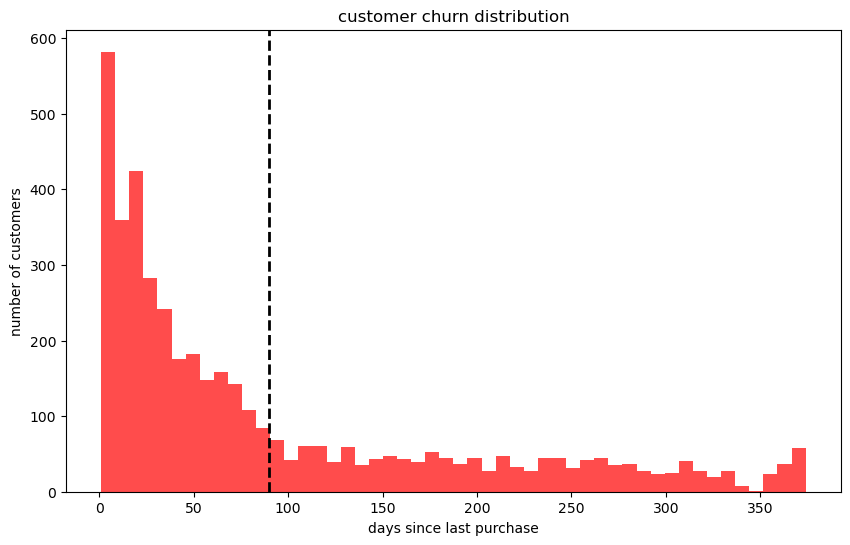

In [101]:
print('number of churned customer: ',len(churned_customer))
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase1,bins=50,color='red',alpha=0.7)
plt.axvline(churn_threshold,color='black',linestyle='dashed',linewidth=2)
plt.title('customer churn distribution')
plt.xlabel('days since last purchase')
plt.ylabel('number of customers')
plt.show()